In [141]:
import pickle
import treeUtil
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Extracts data from the IBC with labels 'Liberal', 'Neutral', and 'Conservative'

In [5]:
[lib, con, neutral] = pickle.load(open('ibcData.pkl', 'rb'))

In [8]:
print(lib[0].get_words())

Forcing middle-class workers to bear a greater share of the cost of government weakens their support for needed investments and stirs resentment toward those who depend on public services the most .


# How to access sentence text

In [9]:
print ('Liberal examples (out of ', len(lib), ' sentences): ')
for tree in lib[0:5]:
    print (tree.get_words())

Liberal examples (out of  2025  sentences): 
Forcing middle-class workers to bear a greater share of the cost of government weakens their support for needed investments and stirs resentment toward those who depend on public services the most .
Because it would not be worthwhile to bring a case for $ 30.22 , the arbitration clause would , as a practical matter , deny the Concepcions any relief and , more important , eliminate a class action that might punish AT&T for its pattern of fraudulent behavior .
Indeed , Lind argues that high profits and high wages reinforce each other because workers then have the wherewithal to buy the products they are making .
In fairness , it should be noted that he devotes an entire chapter to New York Times political columnist Maureen Dowd , a liberal who makes much of the outsized rivalries , jealousies , and personalities that dominate American politics .
Psychological tactics are social control techniques that operate at the level of the mind , with th

In [10]:
print ('\nConservative examples (out of ', len(con), ' sentences): ')
for tree in con[0:5]:
    print (tree.get_words())


Conservative examples (out of  1701  sentences): 
Gore is getting rich from environmentalism , not just by being paid a whopping $ 175,000 per speech but by using political pressure to force government policy in a direction that benefits his business interests .
The Federal Housing Finance Regulatory Reform Act of 2008 should have been an easy sell , since it purportedly aimed to assist homeowners , a more popular ( or at least more sentimentalized ) subset of Americans than greedy Wall Street tycoons .
Yet for all its submerged class snobbery and anti-intellectualism disguised as cool detachment , the ultimate failure of the Washington media lies less with the personal failings of its elite members than its structural inadequacy .
Rumsfeld then went on to discuss how China 's lack of transparency with respect to its defense expenditures and activities raises doubts in the region about China 's intentions .
You never hear from the co-conspirators of the left-wing media how many innoce

In [11]:
print ('\nNeutral examples (out of ', len(neutral), ' sentences): ')
for tree in neutral[0:5]:
    print (tree.get_words())


Neutral examples (out of  600  sentences): 
In this country , the beneficiaries of Apple 's success are , first , the designers , who have done wonders working with Steve Jobs to produce products that are beautiful and effective .
The problem with this argument is that China reports about 68 percent of the world 's aquaculture production , and the FAO , which has been burned by inflated Chinese statistics before , expresses doubt about its stated production and growth rates . ''
The soil exhaustion caused by the plantation system , as well as the relatively low productivity of forced labor , compelled planters to seek new lands to exploit .
The same complexity that leads to such malfunctions also creates vulnerabilities that human agents can use to make computer systems operate in unintended ways .
Threads of new awkwardness stretch out between them , and nature itself winks behind their backs and plays nasty tricks on them , scattering yellow clods of asters and groundsel , blanketin

# How to access phrase labels for a particular tree

In [68]:
#ex_tree = lib[1]

liberal = []
neutral = []
conserv = []
print ('\nPhrase labels for one tree: ')

# see treeUtil.py for the tree class definition
for ex_tree in lib:
    for node in ex_tree:

        # remember, only certain nodes have labels (see paper for details)
        if hasattr(node, 'label'):
            if node.label == "Liberal":
                liberal.append(node.get_words())
            elif node.label == "Neutral":
                neutral.append(node.get_words())
            elif node.label == "Conservative":
                conserv.append(node.get_words())
                (node.label, ': ', node.get_words())
    #             print (type(node.get_words()))

for ex_tree in neutral:
    for node in ex_tree:

        # remember, only certain nodes have labels (see paper for details)
        if hasattr(node, 'label'):
            if node.label == "Liberal":
                liberal.append(node.get_words())
            elif node.label == "Neutral":
                neutral.append(node.get_words())
            elif node.label == "Conservative":
                conserv.append(node.get_words())
                (node.label, ': ', node.get_words())
#             print (type(node.get_words()))



for ex_tree in con:
    for node in ex_tree:

        # remember, only certain nodes have labels (see paper for details)
        if hasattr(node, 'label'):
            if node.label == "Liberal":
                liberal.append(node.get_words())
            elif node.label == "Neutral":
                neutral.append(node.get_words())
            elif node.label == "Conservative":
                conserv.append(node.get_words())
                (node.label, ': ', node.get_words())
#             print (type(node.get_words()))

print (len(liberal))
print (len(neutral))
print (len(conserv))





Phrase labels for one tree: 
7706
5522
5884


## Converts the data in a dataframe

In [172]:
polit = {"liberal": liberal, "neutral":neutral, "conserv":conserv}
l = pd.DataFrame({"liberal":liberal})
n = pd.DataFrame({"neutral":neutral})
c = pd.DataFrame({"conservative":conserv})

In [103]:
data = pd.concat([l,n,c], axis=1)
data['neutral'] = data['neutral'].fillna('')
data['conservative'] = data['conservative'].fillna('')

## Cleaning the data

In [106]:
#lowercase
data['liberal'] = data['liberal'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['neutral'] = data['neutral'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['conservative'] = data['conservative'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#removes punctuation
data['liberal'] = data['liberal'].str.replace('[^\w\s]','')
data['neutral'] = data['neutral'].str.replace('[^\w\s]','')
data['conservative'] = data['conservative'].str.replace('[^\w\s]','')
#removes stop words
stop = stopwords.words('english')
data['liberal'] = data['liberal'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['neutral'] = data['neutral'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['conservative'] = data['conservative'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## Top 10 words followed by a word cloud

In [167]:
freqLib = pd.Series(' '.join(data['liberal']).split()).value_counts()[:10]
freqLib

tax           686
energy        571
would         548
health        545
care          539
people        510
new           445
government    442
make          438
public        429
dtype: int64

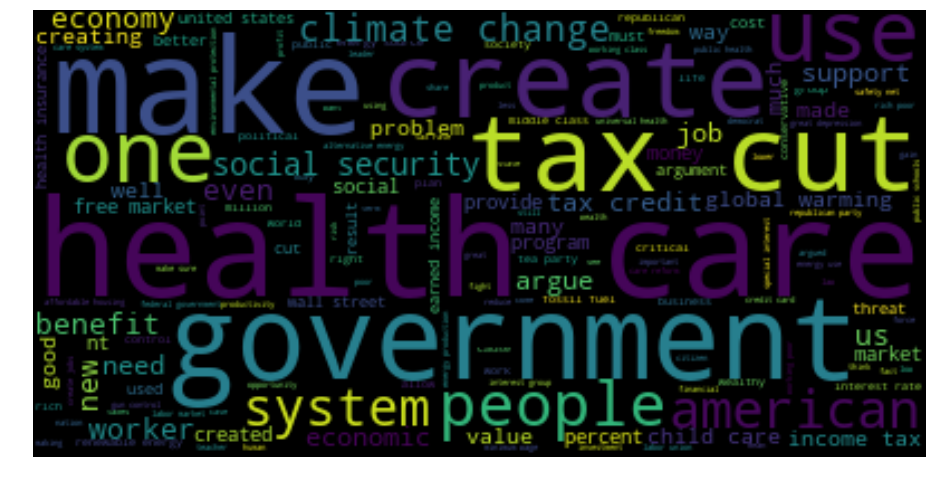

In [146]:
wordcloud = WordCloud(max_font_size=60).generate((" ").join(data['liberal']))
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#data['liberal']

In [169]:
freqNeu = pd.Series(' '.join(data['neutral']).split()).value_counts()[:10]
freqNeu

market      123
tax         111
people      108
economy     103
one         102
economic     98
make         90
care         88
new          86
jobs         84
dtype: int64

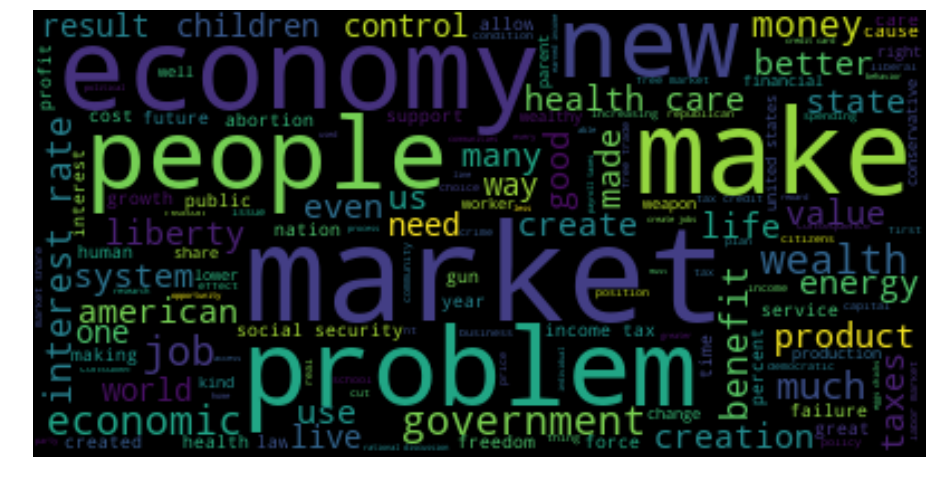

In [147]:
wordcloud = WordCloud(max_font_size=60).generate((" ").join(data['neutral']))
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [171]:
freqCon = pd.Series(' '.join(data['conservative']).split()).value_counts()[:10]
freqCon

government    841
would         426
free          382
people        376
economic      373
make          358
federal       334
market        318
us            312
care          286
dtype: int64

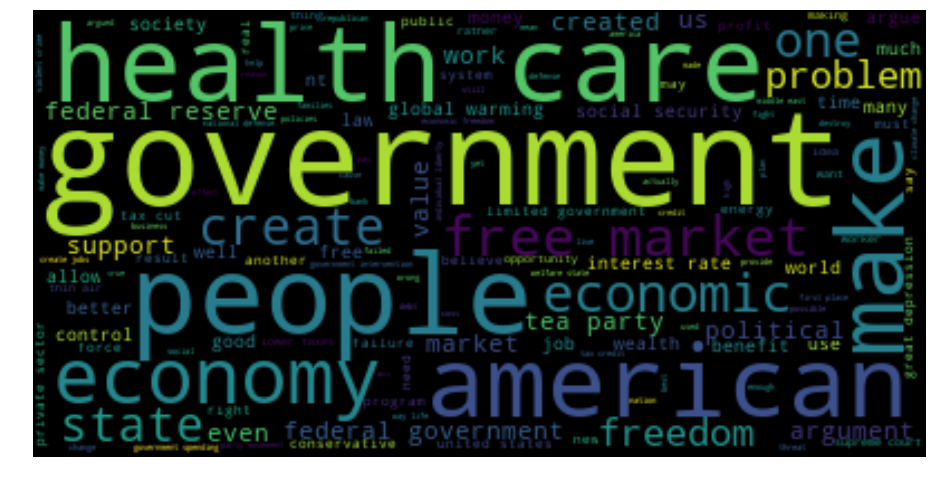

In [148]:
wordcloud = WordCloud(max_font_size=60).generate((" ").join(data['conservative']))
plt.figure(figsize=(16,12))
# plot wordcloud in matplotlib
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# plt.figure(figsize=(16,8))
#for col in data:
plot_array = (" ").join(data["neutral"]).split()
plt.plot(np.arange(0,len(plot_array))*5000,plot_array,label="neutral")
plt.legend()
plt.xlabel('Word offset')
plt.ylabel('Lexical diversity')
plt.show()